In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz
import serial

# Filtro

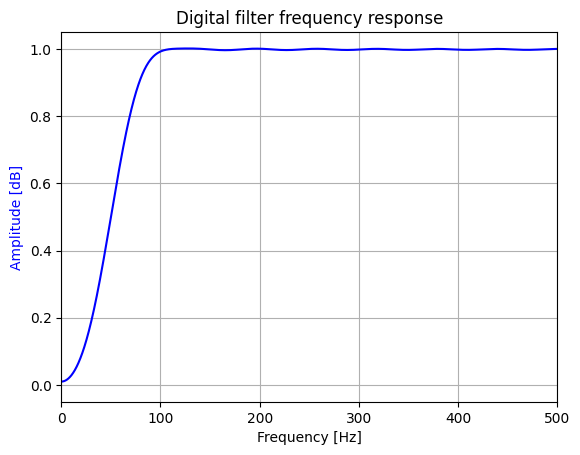

In [41]:
# Filter requirements
fs = 1000 # Sample rate, Hz
cutoff = 50 # Desired cutoff frequency, Hz
trans_width = 5 # Width of transition from pass band to stop band, Hz
numtaps = 33 # Size of the FIR filter

# Compute the filter coefficients using the firwin function
taps = firwin(numtaps, cutoff, window='hamming', pass_zero=False, fs=fs)

# Compute the frequency response of the filter
w, h = freqz(taps, 1, worN=2000)

# Plot the frequency response
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [Hz]')
ax1.set_ylim([-0.05, 1.05])
ax1.set_xlim([0, 0.5*fs])
ax1.grid()

plt.show()


In [42]:
for val in taps:
    print(f"{val},")

0.0015115451098377376,
0.0018825913790288383,
0.002483585545241963,
0.0031160595343624215,
0.0033433106148237557,
0.0025399291880564756,
-1.558506734552068e-17,
-0.004914128527513414,
-0.012611514421013636,
-0.023134852490067574,
-0.03607727546279237,
-0.05057652387209304,
-0.0653946653020385,
-0.0790744643582674,
-0.09014753340161663,
-0.09735795708930048,
0.8987464021635272,
-0.09735795708930048,
-0.09014753340161663,
-0.0790744643582674,
-0.0653946653020385,
-0.05057652387209304,
-0.03607727546279239,
-0.023134852490067574,
-0.012611514421013636,
-0.004914128527513413,
-1.558506734552067e-17,
0.0025399291880564756,
0.0033433106148237557,
0.0031160595343624215,
0.0024835855452419653,
0.0018825913790288383,
0.0015115451098377376,


# Prueba

In [43]:
puerto = serial.Serial('/dev/ttyACM0', 9600)

In [58]:
# Generar la señal (por ejemplo, una señal sinusoidal)
fs = 1000  # Frecuencia de muestreo en Hz
f = 400     # Frecuencia de la señal en Hz
tiempo = 0.25
t = np.arange(0, tiempo, 1/fs)  # Vector de tiempo de 1 segundo de duración
#signal = np.sin(2 * np.pi * f * t)  # Señal sinusoidal
signal = np.sign(np.sin(2 * np.pi * f * t)) # señal cuadrada

res = np.zeros(signal.shape[0])

In [59]:
i = 0
for sample in signal:
    sample_int = int((sample + 1) * 127.5)
    puerto.write(bytes([sample_int]))
    byte = puerto.read(1)
    res[i] = int.from_bytes(byte, byteorder='big', signed=False)
    i += 1

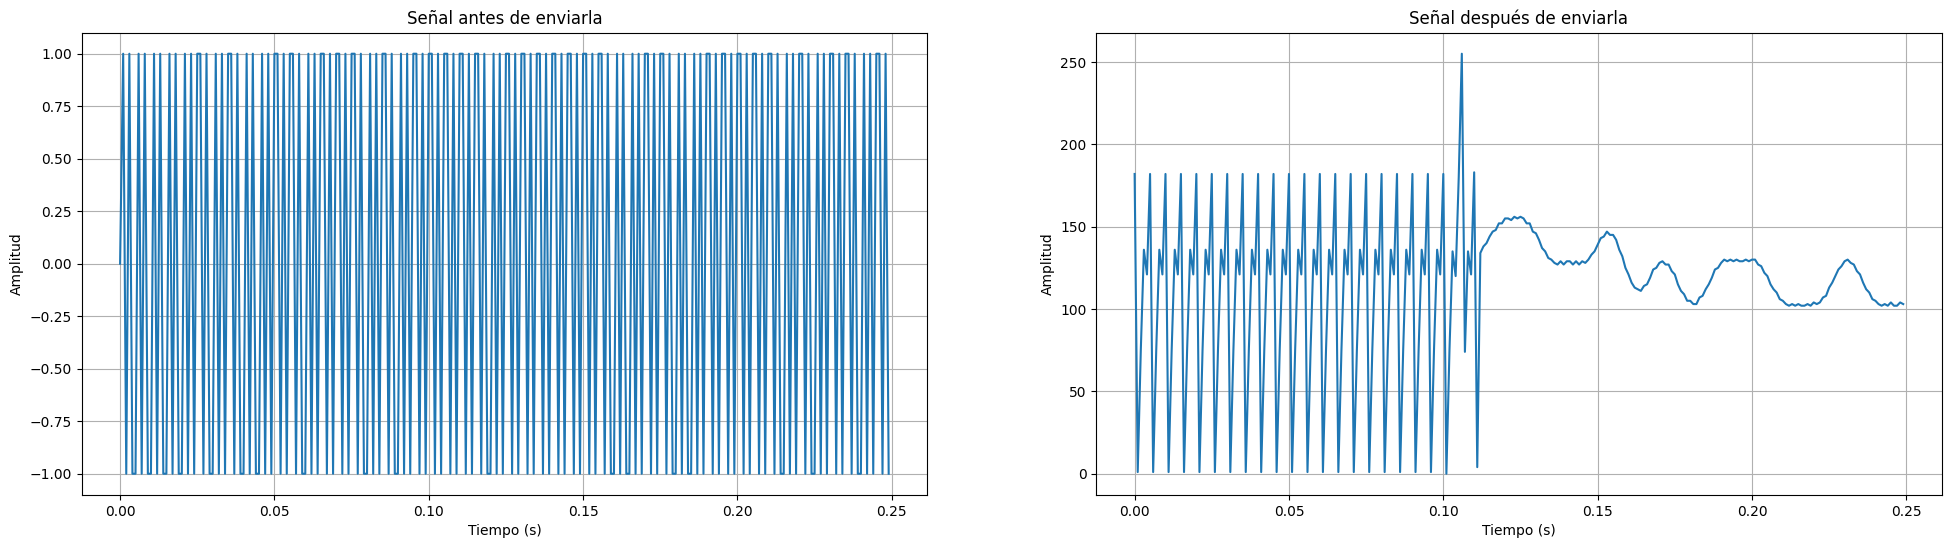

In [60]:
# Definir la figura y los subgráficos
fig, axs = plt.subplots(1, 2, figsize=(24, 6))

# Graficar la señal antes de enviarla
axs[0].plot(t, signal)
axs[0].set_title('Señal antes de enviarla')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].grid(True)

# Graficar la señal después de enviarla
axs[1].plot(t, res)
axs[1].set_title('Señal después de enviarla')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].grid(True)

# Mostrar la figura
plt.show()

In [61]:
# Es necesario cerrar el puerto para poder subir nuevo codigo
puerto.close()